In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read dataframe from csv and trim the data
df = pd.read_csv("results.csv")

In [50]:
df['new']=df['cleaned']*2+df['efficiency']

In [51]:
df['new2']=df['cleaned']*df['efficiency']/100

In [52]:
df.sort_values(by=['cleaned', 'efficiency'])

,Unnamed: 0,gamma,epsilon,episodes,steps,cleaned,efficiency,new,new2
556,556,0.9,0.10,300.0,100.0,15.686275,33.993399,65.365948,5.332298
466,466,0.9,0.05,150.0,100.0,15.686275,34.333333,65.705882,5.385621
537,537,0.9,0.10,150.0,100.0,15.686275,35.888502,67.261051,5.629569
539,539,0.9,0.10,150.0,100.0,15.686275,36.267606,67.640155,5.689036
538,538,0.9,0.10,150.0,100.0,15.686275,37.591241,68.963790,5.896665
...,...,...,...,...,...,...,...,...,...
85,85,0.5,0.10,50.0,50.0,98.039216,49.519231,245.597662,48.548265
345,345,0.7,0.10,500.0,6.0,98.039216,50.000000,246.078431,49.019608
21,21,0.5,0.05,150.0,6.0,99.019608,52.284264,250.323480,51.771673
187,187,0.5,0.20,300.0,12.0,99.019608,59.195402,257.234618,58.615055


In [53]:
grp = df.groupby(['gamma','epsilon','episodes','steps'])

In [54]:
x =grp.mean().sort_values(by=['cleaned', 'efficiency'])

In [55]:
x = x.reset_index()

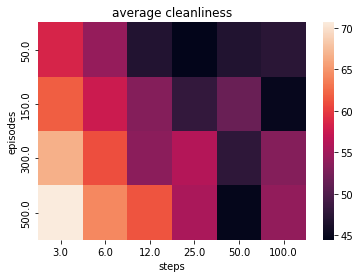

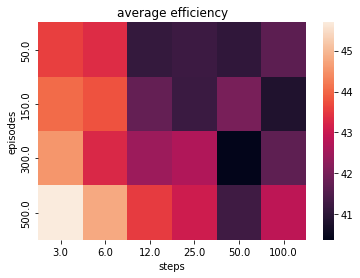

In [56]:
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('mc-500x100-clean.png')
plt.show()
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('mc-500x100-eff.png')
plt.show()

In [57]:
col1, col2 = "cleaned", "efficiency"
corr = x[col1].corr(x[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  cleaned  and  efficiency is:  0.87


In [58]:
mask = (x["steps"]==3) & (x["episodes"]==500)
y = x[mask]
y

,gamma,epsilon,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
98,0.5,0.20,500.0,3.0,199.0,54.248366,43.585799,152.082531,23.659591
124,0.5,0.10,500.0,3.0,127.0,58.823529,41.918224,159.565283,24.707976
161,0.7,0.20,500.0,3.0,415.0,64.052288,44.344132,172.448708,28.499525
170,0.5,0.05,500.0,3.0,55.0,66.993464,45.264565,179.251493,31.062593
183,0.9,0.05,500.0,3.0,487.0,69.934641,47.024773,186.894054,34.201666
202,0.9,0.10,500.0,3.0,559.0,74.836601,44.718147,194.391350,34.040515
203,0.7,0.10,500.0,3.0,343.0,74.836601,44.874699,194.547902,33.950967
214,0.9,0.20,500.0,3.0,631.0,84.967320,48.473114,218.407754,41.489648
215,0.7,0.05,500.0,3.0,271.0,87.254902,50.992203,225.502007,44.775239


In [59]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


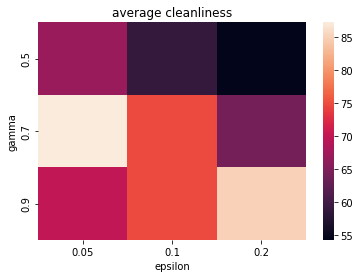

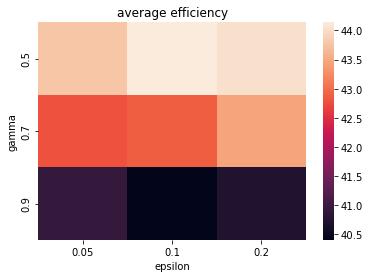

In [60]:
gropued = y.groupby([ 'gamma','epsilon'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('mc-epsilonxgamma-clean.png')
plt.show()
gropued = x.groupby([ 'gamma','epsilon'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('mc-epsilonxgamma-eff.png')
plt.show()